# Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Preprocessing

### Training Image Processing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


# Bulding Model

In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [16]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# Compiling and Training Phase

In [17]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,460,164 (5.57 MB)

 Trainable params: 1,460,164 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 782s 8s/step - accuracy: 0.0328 - loss: 3.8574 - val_accuracy: 0.0570 - val_loss: 3.4308
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.0547 - loss: 3.4344 - val_accuracy: 0.0684 - val_loss: 3.2047
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.0659 - loss: 3.2974 - val_accuracy: 0.1510 - val_loss: 2.9537
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.1092 - loss: 3.1000 - val_accuracy: 0.2165 - val_loss: 2.7978
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.1314 - loss: 2.9809 - val_accuracy: 0.2707 - val_loss: 2.6739
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.1592 - loss: 2.8786 - val_accuracy: 0.3048 - val_loss: 2.4853
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.1896 - loss: 2.7544 - val_accuracy: 0.2906 - val_loss: 2.4597
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.1968 - loss: 2.7171 - val_accuracy: 0.4131 - v

In [21]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 90s 912ms/step - accuracy: 0.9371 - loss: 0.2669
Training accuracy: 0.9329053163528442


In [22]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9238 - loss: 0.4278
Validation accuracy: 0.9145299196243286


# Saving Task

In [25]:
cnn.save('trained_model.h5')

In [26]:
training_history.history #Return Dictionary of history

{'accuracy': [0.03788122162222862,
  0.05585874617099762,
  0.07640449702739716,
  0.11139646917581558,
  0.13836276531219482,
  0.16019262373447418,
  0.19004815816879272,
  0.21091492474079132,
  0.26099517941474915,
  0.3008025586605072,
  0.32327449321746826,
  0.37207064032554626,
  0.4035313129425049,
  0.44686996936798096,
  0.5036917924880981,
  0.516853928565979,
  0.5691813826560974,
  0.5839486122131348,
  0.6176565289497375,
  0.6561797857284546,
  0.6780096292495728,
  0.6988763809204102,
  0.7210273146629333,
  0.7255216836929321,
  0.7524879574775696,
  0.7791332006454468,
  0.7714285850524902,
  0.7910112142562866,
  0.8234350085258484,
  0.8388442993164062],
 'loss': [3.6356217861175537,
  3.3872272968292236,
  3.2569005489349365,
  3.059318780899048,
  2.929422616958618,
  2.8520359992980957,
  2.720674514770508,
  2.6314549446105957,
  2.4923107624053955,
  2.35355806350708,
  2.22489070892334,
  2.093472957611084,
  1.975651741027832,
  1.8071138858795166,
  1.68186

In [27]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [28]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Accuracy Visualization

In [29]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 91.45299196243286 %


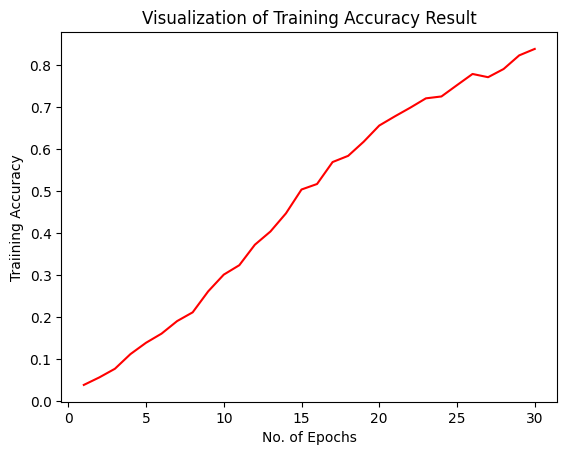

In [32]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

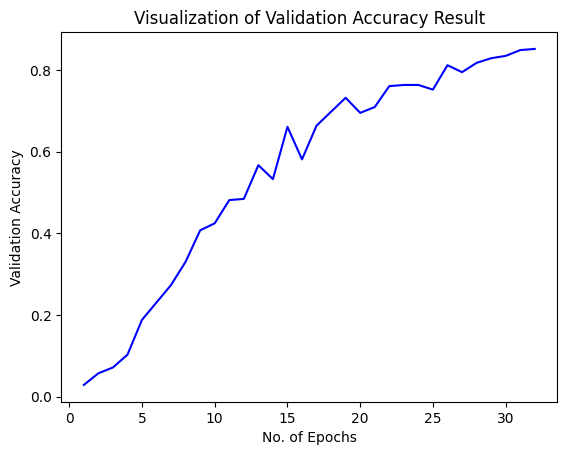

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.
